In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
#from sklearn.metrics import confusion_matrix, classification_report

LONDON_DATA_FILE_GROUPED_TIMESERIES= 'house_prices_london_grouped_timeseries.csv'

In [2]:
df = pd.read_csv(LONDON_DATA_FILE_GROUPED_TIMESERIES, header=0)

In [3]:
#df.dtypes

In [4]:
#df = df[df['Sold Price']<1000000]

In [5]:
df.dropna(subset=['Type'], inplace=True)
dummy_df = pd.get_dummies(df['Type'])
df = pd.concat([df, dummy_df], axis=1)
df.drop('Type', axis=1, inplace=True)

In [6]:
#df.head()

In [7]:
#df.dropna(subset=['Postcode_short'], inplace=True)
dummy_df = pd.get_dummies(df['Postcode_short'])
df = pd.concat([df, dummy_df], axis=1)
df.drop('Postcode_short', axis=1, inplace=True)

In [8]:
#df.head()

In [9]:
final_df=df[df['Sold Year']>=1998] #data prior to this has Nan

In [10]:
final_df.shape

(11583, 200)

In [11]:
final_df=final_df.dropna() #drop all rows with Nan

In [12]:
final_df.shape

(10121, 200)

In [13]:
final_df.head(5)

,Sold Price,Sold Year,Sold Price prev year,Sold Price prev year2,Sold Price prev year3,D,F,O,S,T,...,WC1N,WC1R,WC1V,WC1X,WC2A,WC2B,WC2E,WC2H,WC2N,WC2R
12,112995.0,1998,79997.5,63950.0,57995.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,130000.0,1998,149497.5,94000.0,77000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14,118000.0,1998,102000.0,80000.0,81000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16,121075.0,1999,112995.0,79997.5,63950.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,140000.0,1999,130000.0,149497.5,94000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
train_df=final_df[final_df['Sold Year']<=2010]
test_df=final_df[final_df['Sold Year']>2010]

In [15]:
train_df.shape

(6489, 200)

In [16]:
test_df.shape

(3632, 200)

In [17]:
X_train=train_df.drop(['Sold Price'],axis=1)
col_names = X_train.columns
X_train = np.array(X_train)
y_train=train_df['Sold Price'] 
y_train = np.array(y_train)

In [18]:
X_test=test_df.drop(['Sold Price'],axis=1)
X_test = np.array(X_test)
y_test=test_df['Sold Price'] 
y_test = np.array(y_test)

In [19]:
print(X_train.shape)
print(y_train.shape)

(6489, 199)
(6489,)


In [20]:
print(X_test.shape)
print(y_test.shape)

(3632, 199)
(3632,)


In [21]:
model = DecisionTreeRegressor(min_samples_leaf=35, min_samples_split=10) 
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=35,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [22]:
y_pred = model.predict(X_test) #so putting X_test data through model to calc y predicted

In [23]:
y_actual = y_test #rename to make it easier to understand
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.645508307578
0.355166184695
1.62593393892e+12
357354.652867


0.355166184695


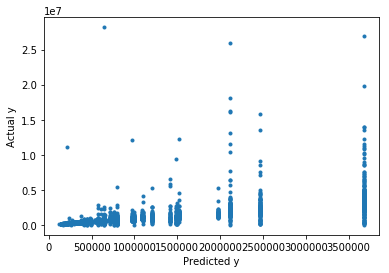

In [24]:
# Test R^2
print(model.score(X_test, y_actual))
plt.scatter(y_pred, y_actual, marker='.')
plt.xlabel('Predicted y')
plt.ylabel('Actual y')
#plt.gca().set_aspect('equal')
plt.show()
#output not that useful here

#about 4.4m competely out as puts it all in the same bucket thereafter

In [25]:
for a, b in zip(y_pred, y_actual):
    print("Predicted = {0}, Actual = {1}".format(a, b))

Predicted = 267329.4871794872, Actual = 296687.5
Predicted = 446211.4528301887, Actual = 362000.0
Predicted = 446211.4528301887, Actual = 406500.0
Predicted = 374644.85714285716, Actual = 295000.0
Predicted = 492480.0833333333, Actual = 480000.0
Predicted = 423809.375, Actual = 465000.0
Predicted = 337264.0909090909, Actual = 335000.0
Predicted = 444036.1842105263, Actual = 570000.0
Predicted = 333332.2653061224, Actual = 397500.0
Predicted = 574755.4696969697, Actual = 731250.0
Predicted = 408146.10447761195, Actual = 475000.0
Predicted = 718096.4019607843, Actual = 650000.0
Predicted = 444036.1842105263, Actual = 500000.0
Predicted = 1486485.0, Actual = 415000.0
Predicted = 651071.2209302326, Actual = 719000.0
Predicted = 444036.1842105263, Actual = 518000.0
Predicted = 791741.5, Actual = 250000.0
Predicted = 791741.5, Actual = 857500.0
Predicted = 238888.75, Actual = 245000.0
Predicted = 178064.0, Actual = 166100.0
Predicted = 301182.85714285716, Actual = 250000.0
Predicted = 229584

Predicted = 403050.36029411765, Actual = 383000.0
Predicted = 333332.2653061224, Actual = 450000.0
Predicted = 238888.75, Actual = 317525.0
Predicted = 580798.8620689656, Actual = 532500.0
Predicted = 408146.10447761195, Actual = 490000.0
Predicted = 580798.8620689656, Actual = 815000.0
Predicted = 291554.6052631579, Actual = 337000.0
Predicted = 444036.1842105263, Actual = 52672.5
Predicted = 574755.4696969697, Actual = 532500.0
Predicted = 444036.1842105263, Actual = 572500.0
Predicted = 333332.2653061224, Actual = 365000.0
Predicted = 492480.0833333333, Actual = 206064.0
Predicted = 574755.4696969697, Actual = 580000.0
Predicted = 574755.4696969697, Actual = 600000.0
Predicted = 614369.659574468, Actual = 435000.0
Predicted = 267329.4871794872, Actual = 270000.0
Predicted = 480070.5128205128, Actual = 550000.0
Predicted = 653732.6388888889, Actual = 585000.0
Predicted = 614369.659574468, Actual = 461000.0
Predicted = 238888.75, Actual = 300000.0
Predicted = 574755.4696969697, Actual

Predicted = 2467000.793103448, Actual = 965000.0
Predicted = 423809.375, Actual = 420499.5
Predicted = 1410677.6315789474, Actual = 558500.0
Predicted = 1496800.0, Actual = 1746250.0
Predicted = 1486485.0, Actual = 730000.0
Predicted = 423809.375, Actual = 496100.0
Predicted = 2114035.12, Actual = 1540000.0
Predicted = 969570.2162162162, Actual = 12125000.0
Predicted = 444036.1842105263, Actual = 699950.0
Predicted = 1972643.2692307692, Actual = 1900000.0
Predicted = 2114035.12, Actual = 16250000.0
Predicted = 574755.4696969697, Actual = 729400.0
Predicted = 2114035.12, Actual = 1887500.0
Predicted = 2467000.793103448, Actual = 15800000.0
Predicted = 760804.1145833334, Actual = 785000.0
Predicted = 791741.5, Actual = 851000.0
Predicted = 2467000.793103448, Actual = 2052500.0
Predicted = 760804.1145833334, Actual = 652500.0
Predicted = 1486485.0, Actual = 200000.0
Predicted = 2467000.793103448, Actual = 2075000.0
Predicted = 791741.5, Actual = 767500.0
Predicted = 990273.2558139535, Act

In [26]:
mean_absolute_error(y_actual, y_pred) 

357354.65286650206

In [27]:
list(zip(col_names, model.feature_importances_))

[('Sold Year', 0.0048890147794300428),
 ('Sold Price prev year', 0.085718040194224715),
 ('Sold Price prev year2', 0.28250496962299998),
 ('Sold Price prev year3', 0.62528698233266711),
 ('D', 0.0015065455229076724),
 ('F', 9.4447547770315095e-05),
 ('O', 0.0),
 ('S', 0.0),
 ('T', 0.0),
 ('E1', 0.0),
 ('E10', 0.0),
 ('E11', 0.0),
 ('E12', 0.0),
 ('E13', 0.0),
 ('E14', 0.0),
 ('E15', 0.0),
 ('E16', 0.0),
 ('E17', 0.0),
 ('E18', 0.0),
 ('E1W', 0.0),
 ('E2', 0.0),
 ('E20', 0.0),
 ('E3', 0.0),
 ('E4', 0.0),
 ('E5', 0.0),
 ('E6', 0.0),
 ('E7', 0.0),
 ('E8', 0.0),
 ('E9', 0.0),
 ('EC1A', 0.0),
 ('EC1M', 0.0),
 ('EC1N', 0.0),
 ('EC1R', 0.0),
 ('EC1V', 0.0),
 ('EC1Y', 0.0),
 ('EC2A', 0.0),
 ('EC2M', 0.0),
 ('EC2N', 0.0),
 ('EC2P', 0.0),
 ('EC2R', 0.0),
 ('EC2V', 0.0),
 ('EC2Y', 0.0),
 ('EC3A', 0.0),
 ('EC3M', 0.0),
 ('EC3N', 0.0),
 ('EC3R', 0.0),
 ('EC3V', 0.0),
 ('EC4A', 0.0),
 ('EC4M', 0.0),
 ('EC4N', 0.0),
 ('EC4R', 0.0),
 ('EC4V', 0.0),
 ('EC4Y', 0.0),
 ('EN3', 0.0),
 ('EN4', 0.0),
 ('EN5'